In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import det
bec = BestEffortCallback()
RE = RunEngine({})
from collections import defaultdict
from ophyd.sim import det  # type: ignore

In [2]:
 with DeviceCollector(mock=False):
        mock_sampleAngleStage = SampleAngleStage(
            "p99-MO-TABLE-01:", name="mock_sampleAngleStage"
        )
        mock_filter_wheel = FilterMotor(
            "p99-MO-STAGE-02:MP:SELECT", name="mock_filter_wheel"
        )
        xyz_motor = SoftThreeAxisStage("p99-MO-STAGE-02:", name="xyz_motor")
docs = defaultdict(list)

def capture_emitted(name, doc):
    docs[name].append(doc)


CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XHLM", Connecting to: host.containers.internal:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Mon Jun 24 2024 10:16:23.147046064
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XSTOP", Connecting to: host.containers.internal:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Mon Jun 24 2024 10:16:23.147052474
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:Y.EGU", Connecting to: host.containers.internal:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Mo

In [3]:
from collections import defaultdict
from pathlib import Path
from unittest.mock import Mock

import pytest
from bluesky.plans import scan
from bluesky.run_engine import RunEngine
from bluesky.utils import new_uid
from ophyd.sim import SynAxis
from ophyd_async.core import (
    DeviceCollector,
    StaticDirectoryProvider,
    assert_emitted,
    callback_on_mock_put,
    set_mock_value,
)
from ophyd_async.epics.areadetector.drivers.ad_base import DetectorState

from p99_bluesky.devices.andor2Ad import Andor2Ad, Andor3Ad, StaticDirectoryProviderPlus
from p99_bluesky.plans.ad_plans import takeImg, tiggerImg

CURRENT_DIRECTORY = Path(".")

In [4]:

dp = StaticDirectoryProviderPlus(CURRENT_DIRECTORY, "test-")

async with DeviceCollector(mock=True):
    andor2 = Andor2Ad("TEST", dp, "andor2")

set_mock_value(andor2._controller.driver.array_size_x, 10)
set_mock_value(andor2._controller.driver.array_size_y, 20)
set_mock_value(andor2.hdf.file_path_exists, True)
set_mock_value(andor2.hdf.num_captured, 0)
set_mock_value(andor2.hdf.file_path, str(CURRENT_DIRECTORY))

set_mock_value(
        andor2.hdf.full_file_name, str(CURRENT_DIRECTORY) + "/test-andor2-hdf0"
    )



Transient Scan ID: 1     Time: 2024-06-24 10:16:33
Persistent Unique Scan ID: 'ed6fdf1c-4323-4519-9d98-de620e129906'
New stream: 'primary'


/venv/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:248: UserWarning: Omitting andor2 from plot because dtype is array
  warn("Omitting {} from plot because dtype is {}"
/venv/lib/python3.11/site-packages/bluesky/callbacks/core.py:332: UserWarning: The key andor2 will be skipped because LiveTable does not know how to display the dtype array
  warnings.warn("The key {} will be skipped because LiveTable "


+-----------+------------+-------------+
|   seq_num |       time | xyz_motor-x |
+-----------+------------+-------------+
|         1 | 10:16:34.9 |          -3 |
|         2 | 10:16:35.1 |          -2 |
|         3 | 10:16:35.4 |          -2 |
|         4 | 10:16:35.6 |          -1 |
|         5 | 10:16:35.8 |          -0 |
|         6 | 10:16:36.0 |           0 |
|         7 | 10:16:36.3 |           1 |
|         8 | 10:16:36.5 |           2 |
|         9 | 10:16:36.7 |           2 |
|        10 | 10:16:36.9 |           3 |
+-----------+------------+-------------+
generator scan ['ed6fdf1c'] (scan num: 1)





('ed6fdf1c-4323-4519-9d98-de620e129906',)

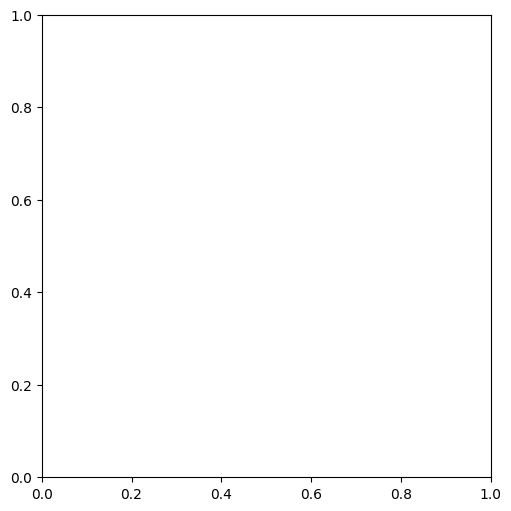

In [5]:
rbv_mocks = Mock()
rbv_mocks.get.side_effect = range(0, 100)
callback_on_mock_put(
    andor2._writer.hdf.capture,
    lambda *_, **__: set_mock_value(andor2._writer.hdf.capture, value=True),
)

callback_on_mock_put(
    andor2.drv.acquire,
    lambda *_, **__: set_mock_value(andor2._writer.hdf.num_captured, rbv_mocks.get()),
)

set_mock_value(andor2.drv.detector_state, DetectorState.Idle)
RE(scan([andor2], xyz_motor.x, -3, 3, 10), [bec,capture_emitted])
# RE(count([andor2], 3))

In [6]:
docs

defaultdict(list,
            {'start': [{'uid': 'ed6fdf1c-4323-4519-9d98-de620e129906',
               'time': 1719224193.9524353,
               'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
               'scan_id': 1,
               'plan_type': 'generator',
               'plan_name': 'scan',
               'detectors': ['andor2'],
               'motors': ('xyz_motor-x',),
               'num_points': 10,
               'num_intervals': 9,
               'plan_args': {'detectors': ['<p99_bluesky.devices.andor2Ad.Andor2Ad object at 0x7f3eb1d54ad0>'],
                'num': 10,
                'args': ['<soft_motor.SoftMotor object at 0x7f3eb33d1a10>',
                 -3,
                 3],
                'per_step': 'None'},
               'hints': {'dimensions': [(['xyz_motor-x'], 'primary')]},
               'plan_pattern': 'inner_product',
               'plan_pattern_module': 'bluesky.plan_patterns',
               'plan_pattern_args': {'num': 10,
                